In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the data:

In [20]:
df = pd.read_csv("E:\Guvi\Projects\Inventory forecasting\\train 2.csv")
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


Exploratory Data Analysis(EDA)

In [21]:
df.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

findings: 
We can see that the data is clean of outliers and duplicates. Since, there will be 
1. 1826 days in 5 years period 
2. As per the data we have 10 unique stores and 50 unique products. 
3. We can not tell whether all the values in sales are right/wrong.

In [22]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

Finding: We can see that all the columns are in 'int64' datatype other than date which is in 'object' datatype.

In [23]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

Changed date column to 'datetime' format for better interpretation and Timeseries forecasting. 

In [24]:
print(df)

             date  store  item  sales
0      2013-01-01      1     1     13
1      2013-01-02      1     1     11
2      2013-01-03      1     1     14
3      2013-01-04      1     1     13
4      2013-01-05      1     1     10
...           ...    ...   ...    ...
912995 2017-12-27     10    50     63
912996 2017-12-28     10    50     59
912997 2017-12-29     10    50     74
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82

[913000 rows x 4 columns]


In [25]:
df.groupby(["item"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})

sales                                               
      count      sum       mean median        std min  max
item                                                      
1     18260   401384  21.981599   21.0   8.468922   1   59
2     18260  1069564  58.574151   56.0  20.093015   9  150
3     18260   669087  36.642223   35.0  13.179441   7  104
4     18260   401907  22.010241   21.0   8.403898   0   66
5     18260   335230  18.358708   18.0   7.265167   1   50
6     18260  1068281  58.503888   56.0  20.174898  11  148
7     18260  1068777  58.531051   56.0  20.146002  11  141
8     18260  1405108  76.950055   74.0  26.130697  15  181
9     18260   938379  51.389869   49.5  17.790158   6  134
10    18260  1337133  73.227437   70.0  24.823725  14  175
11    18260  1271925  69.656353   67.0  23.744732  11  170
12    18260  1271534  69.634940   67.0  23.738663  12  170
13    18260  1539621  84.316594   81.0  28.311031  20  210
14    18260  1071531  58.681873   56.0  20.079860  12  152
15    18260  1607442  88.030778   85.0  29.522852  17  231
16    18260   468480  25.656079   25.0   9.603270   2   70
17    18260   602486  32.994852   32.0  11.967610   4   83
18    18260  1538876  84.275794   81.0  28.430621  18  208
19    18260   736892  40.355531   39.0  14.332645   5   99
20    18260   867641  47.515936   46.0  16.490487   9  127
21    18260   736190  40.317087   39.0  14.338006   7  109
22    18260  1469971  80.502245   78.0  27.118163  14  214
23    18260   534979  29.297864   28.0  10.819549   3   81
24    18260  1205975  66.044633   64.0  22.531555  14  156
25    18260  1473334  80.686418   78.0  27.238817  18  193
26    18260   869981  47.644085   46.0  16.723912   8  119
27    18260   402628  22.049726   21.0   8.461641   1   59
28    18260  1604713  87.881325   85.0  29.501781  16  206
29    18260  1271240  69.618839   67.0  23.635631  15  173
30    18260   736554  40.337021   39.0  14.363331   5  115
31    18260  1070845  58.644304   57.0  20.104705  10  159
32    18260   803107  43.981763   42.0  15.574556   5  119
33    18260  1270183  69.560953   67.0  23.718343  15  169
34    18260   469935  25.735761   25.0   9.617910   2   79
35    18260  1201541  65.801807   63.0  22.461990  12  168
36    18260  1406548  77.028916   74.0  26.067440  16  188
37    18260   534258  29.258379   28.0  10.771547   3   74
38    18260  1470330  80.521906   77.0  27.141799  15  188
39    18260   801311  43.883406   42.0  15.511550   7  112
40    18260   534094  29.249398   28.0  10.822959   3   74
41    18260   401759  22.002136   21.0   8.402470   2   60
42    18260   669925  36.688116   35.0  13.215112   5   96
43    18260   936635  51.294359   49.0  17.801008   9  126
44    18260   536811  29.398193   28.0  10.797738   3   78
45    18260  1471467  80.584173   78.0  27.318402  18  205
46    18260  1070764  58.639869   56.0  20.220879  11  150
47    18260   401781  22.003341   21.0   8.420102   2   61
48    18260   937703  51.352848   49.0  17.881917   8  130
49    18260   535663  29.335323   28.0  10.874788   3   77
50    18260  1203009  65.882202   63.0  22.416031  12  164

Grouping by date, store, item to get overall sales of a particular item on a particular date across 10 stores.

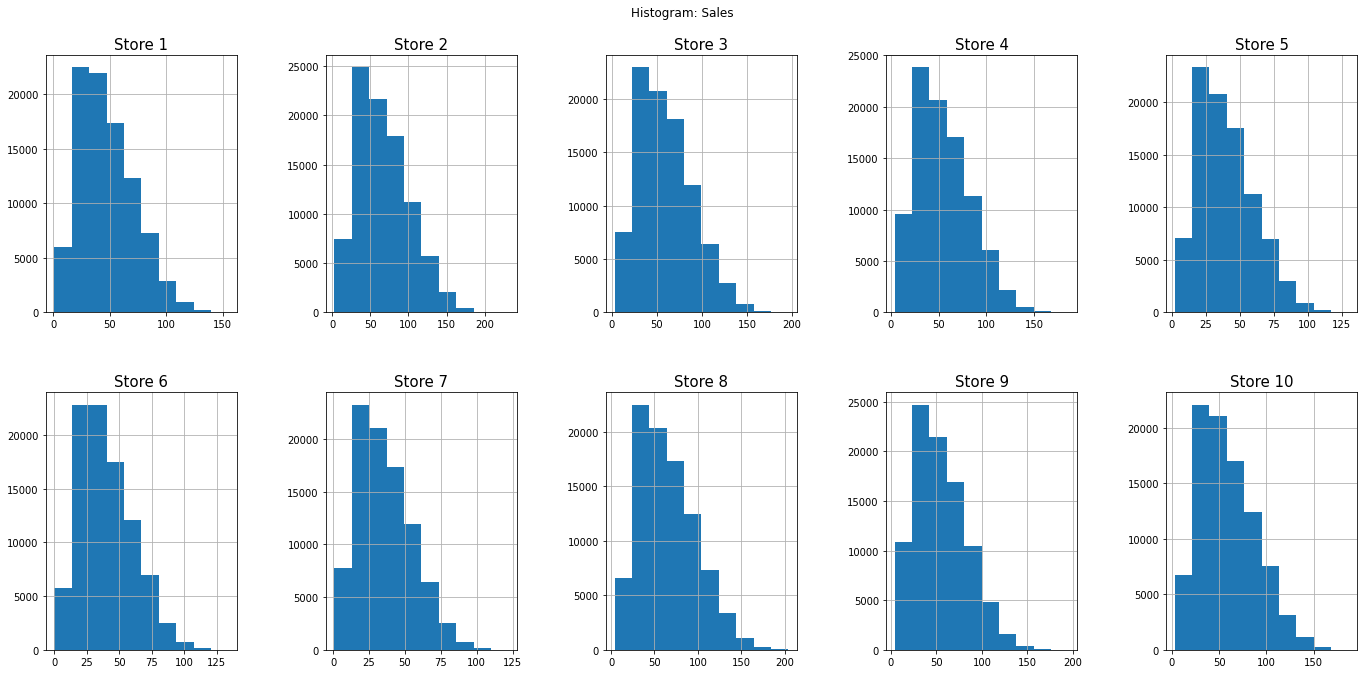

In [26]:
#histogram for store sales 

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i in range(1,11):
    if i < 6:
        df[df.store == i].sales.hist(ax=axes[0, i-1])
        axes[0,i-1].set_title("Store " + str(i), fontsize = 15)
        
    else:
        df[df.store == i].sales.hist(ax=axes[1, i - 6])
        axes[1,i-6].set_title("Store " + str(i), fontsize = 15)
plt.tight_layout(pad=4.5)
plt.suptitle("Histogram: Sales");

In [27]:
df = df.groupby(['date','item'], as_index = False).sales.sum()
df

,date,item,sales
0,2013-01-01,1,133
1,2013-01-01,2,327
2,2013-01-01,3,172
3,2013-01-01,4,102
4,2013-01-01,5,83
...,...,...,...
91295,2017-12-31,46,605
91296,2017-12-31,47,211
91297,2017-12-31,48,494
91298,2017-12-31,49,285


In [28]:
df = df.groupby(['item','date'],as_index = False).sales.sum()
df

,item,date,sales
0,1,2013-01-01,133
1,1,2013-01-02,99
2,1,2013-01-03,127
3,1,2013-01-04,145
4,1,2013-01-05,149
...,...,...,...
91295,50,2017-12-27,511
91296,50,2017-12-28,587
91297,50,2017-12-29,596
91298,50,2017-12-30,612


In [29]:
item_seperated_dataframes = df.item.unique()
item_seperated_dataframes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [30]:
DataframeDict = {}
DataframeDict = {x:item_seperated_dataframes for x in item_seperated_dataframes}
for key in DataframeDict.keys():
    DataframeDict[key] = df[:][df.item == key]

In [31]:
DataframeDict[2]

,item,date,sales
1826,2,2013-01-01,327
1827,2,2013-01-02,279
1828,2,2013-01-03,304
1829,2,2013-01-04,359
1830,2,2013-01-05,377
...,...,...,...
3647,2,2017-12-27,500
3648,2,2017-12-28,495
3649,2,2017-12-29,515
3650,2,2017-12-30,538


In [32]:
DataframeDict[3]

,item,date,sales
3652,3,2013-01-01,172
3653,3,2013-01-02,213
3654,3,2013-01-03,193
3655,3,2013-01-04,218
3656,3,2013-01-05,217
...,...,...,...
5473,3,2017-12-27,282
5474,3,2017-12-28,298
5475,3,2017-12-29,332
5476,3,2017-12-30,342


In [33]:
df_final = pd.DataFrame()

In [34]:
# demand = []
# demand = DataframeDict[2].sales.rolling(window = 90).sum()
# demand = demand.dropna().reset_index(drop= True)
# DataframeDict[2] = DataframeDict[2].reset_index(drop = True)
# DataframeDict[2]['demand'] = pd.DataFrame(demand)
# DataframeDict[2] = DataframeDict[2].dropna()

In [36]:
for i in range(1,51):
    demand = []
    demand = DataframeDict[i].sales.rolling(window = 90).sum()
    demand = demand.dropna().reset_index(drop= True)
    DataframeDict[i] = DataframeDict[i].reset_index(drop = True)
    DataframeDict[i]['demand'] = pd.DataFrame(demand)
    DataframeDict[i] = DataframeDict[i].dropna()
    df_final = df_final.append(DataframeDict[i])


C:\Users\haris\AppData\Local\Temp\ipykernel_7688\2036357876.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(DataframeDict[i])
C:\Users\haris\AppData\Local\Temp\ipykernel_7688\2036357876.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(DataframeDict[i])
C:\Users\haris\AppData\Local\Temp\ipykernel_7688\2036357876.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(DataframeDict[i])
C:\Users\haris\AppData\Local\Temp\ipykernel_7688\2036357876.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(DataframeDict[i])
C:\Users\haris\A

In [37]:
df_final.isnull().sum()

item      0
date      0
sales     0
demand    0
dtype: int64

In [40]:
df_final = df_final.reset_index(drop = True)

In [41]:
df_final

,item,date,sales,demand
0,1,2013-01-01,133,12847.0
1,1,2013-01-02,99,12848.0
2,1,2013-01-03,127,12936.0
3,1,2013-01-04,145,13019.0
4,1,2013-01-05,149,13103.0
...,...,...,...,...
86756,50,2017-09-29,825,62200.0
86757,50,2017-09-30,871,61962.0
86758,50,2017-10-01,907,61687.0
86759,50,2017-10-02,623,61392.0


In [47]:
# df_split = np.split(df_final, [65070], axis=0)
# train = df_split[0]
# test = df_split[1]

In [48]:
# test.shape,train.shape

((21691, 4), (65070, 4))

In [52]:
# DATES FEATURES
def date_features(df):
    # Date Features
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    df['day'] = df.date.dt.day
    df['dayofyear'] = df.date.dt.dayofyear
    df['dayofweek'] = df.date.dt.dayofweek
    df['weekofyear'] = df.date.dt.weekofyear
    
    # Additionnal Data Features
    df['day^year'] = np.log((np.log(df['dayofyear'] + 1)) ** (df['year'] - 2000))
    
    # Drop date
    df.drop('date', axis=1, inplace=True)
    
    return df

# Dates Features for Train, Test
df_final = date_features(df_final)

C:\Users\haris\AppData\Local\Temp\ipykernel_7688\2867223152.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df.date.dt.weekofyear


In [53]:
df_final

,item,sales,demand,year,month,day,dayofyear,dayofweek,weekofyear,day^year
0,1,133,12847.0,2013,1,1,1,1,1,-4.764668
1,1,99,12848.0,2013,1,2,2,2,1,1.222622
2,1,127,12936.0,2013,1,3,3,3,1,4.246245
3,1,145,13019.0,2013,1,4,4,4,1,6.186505
4,1,149,13103.0,2013,1,5,5,5,1,7.581575
...,...,...,...,...,...,...,...,...,...,...
86756,50,825,62200.0,2017,9,29,272,4,39,29.315762
86757,50,871,61962.0,2017,9,30,273,5,39,29.326839
86758,50,907,61687.0,2017,10,1,274,6,39,29.337868
86759,50,623,61392.0,2017,10,2,275,0,40,29.348851


In [54]:
train

,item,sales,demand,year,month,day,dayofyear,dayofweek,weekofyear,day^year
0,1,133,12847.0,2013,1,1,1,1,1,-4.764668
1,1,99,12848.0,2013,1,2,2,2,1,1.222622
2,1,127,12936.0,2013,1,3,3,3,1,4.246245
3,1,145,13019.0,2013,1,4,4,4,1,6.186505
4,1,149,13103.0,2013,1,5,5,5,1,7.581575
...,...,...,...,...,...,...,...,...,...,...
65065,38,1022,87499.0,2015,6,5,156,4,23,24.309364
65066,38,1122,87348.0,2015,6,6,157,5,23,24.328188
65067,38,1162,87128.0,2015,6,7,158,6,23,24.346870
65068,38,785,86934.0,2015,6,8,159,0,24,24.365412


Splitting the dataframe into 50 dataframes to get item specific datasets to analyze and predict the particular item.

In [ ]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='year'>

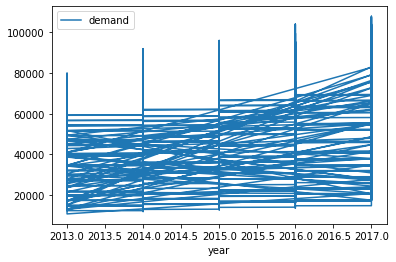

In [58]:
df_final.plot(x = 'year',y = 'demand')#date vs demand

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix

In [61]:
X = df_final.drop("demand", axis=1)

y = df_final.pop("demand")

X.head()

,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,day^year
0,1,133,2013,1,1,1,1,1,-4.764668
1,1,99,2013,1,2,2,2,1,1.222622
2,1,127,2013,1,3,3,3,1,4.246245
3,1,145,2013,1,4,4,4,1,6.186505
4,1,149,2013,1,5,5,5,1,7.581575


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)

In [63]:
X_test

,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,day^year
55935,33,463,2014,3,17,76,0,12,20.562511
6775,4,269,2017,7,12,193,2,28,28.247606
2530,2,637,2015,6,2,153,1,23,24.252019
51192,30,561,2015,6,28,179,6,26,24.709549
86481,50,469,2016,12,28,363,2,52,28.391517
...,...,...,...,...,...,...,...,...,...
47384,28,1005,2014,7,29,210,1,31,23.484213
27833,17,384,2013,5,11,131,5,19,20.614350
86466,50,498,2016,12,13,348,1,50,28.276932
28168,17,344,2014,4,11,101,4,15,21.440587


In [64]:
# Import library for Linear Regression
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [65]:
# Model prediction on train data
y_pred = lm.predict(X_train)
y_pred

array([30466.1983589 , 16390.5967647 , 38779.78040079, ...,
       59644.86898142, 41935.64697871, 21357.00885243])

In [66]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.923791037144817
Adjusted R^2: 0.923779741721977
MAE: 4565.647396530253
MSE: 35056522.61425947
RMSE: 5920.8548888027535


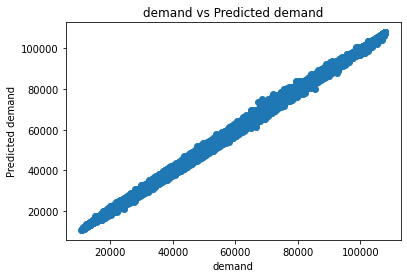

In [75]:
plt.scatter(y_train, y_pred)
plt.xlabel("demand")
plt.ylabel("Predicted demand")
plt.title("demand vs Predicted demand")
plt.show()

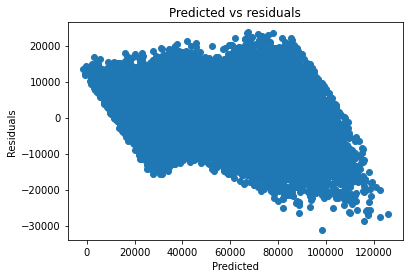

In [68]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [69]:
y_test_pred = lm.predict(X_test)
y_test_pred

array([54962.04147274, 28777.50674623, 63098.81954928, ...,
       42831.80350285, 33416.79207071, 80281.61872345])

In [70]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9240433313555361
Adjusted R^2: 0.9240170578624041
MAE: 4544.098173272574
MSE: 34746889.32788542
RMSE: 5894.649211605846


In [71]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
y_pred = reg.predict(X_train)
y_pred

array([22698.3 , 15283.63, 51805.43, ..., 65952.42, 37434.19, 25578.9 ])

In [73]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9986278571355702
Adjusted R^2: 0.9986276537614096
MAE: 575.9996451623525
MSE: 631192.9142545394
RMSE: 794.4765032740361


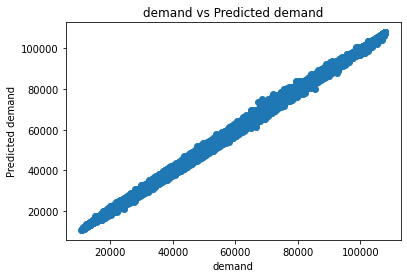

In [76]:
plt.scatter(y_train, y_pred)
plt.xlabel("demand")
plt.ylabel("Predicted demand")
plt.title("demand vs Predicted demand")
plt.show()

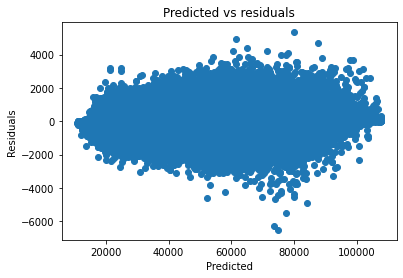

In [77]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [78]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
y_test_pred

array([63662.5 , 24104.92, 63517.32, ..., 51006.19, 32459.17, 83269.65])

In [79]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9902774404551173
Adjusted R^2: 0.9902740774113453
MAE: 1537.4296496215757
MSE: 4447650.305348639
RMSE: 2108.9453063910023


In [80]:
reg.score(X_train,y_train)

0.9986278571355702

In [81]:
reg.score(X_test,y_test)

0.9902774404551173

In [82]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg2 = XGBRegressor()

# Train the model using the training sets 
reg2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [83]:
y_pred = reg2.predict(X_train)

In [84]:
 # Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9933370983189628
Adjusted R^2: 0.9933361107672496
MAE: 1338.1718519093106
MSE: 3064969.718873208
RMSE: 1750.7054917584533


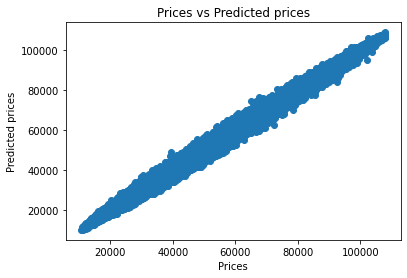

In [85]:
 # Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [86]:
#Predicting Test data with the model
y_test_pred = reg2.predict(X_test)
y_test_pred

array([63122.984, 23880.66 , 62514.86 , ..., 49277.88 , 33270.125,
       81087.586], dtype=float32)

In [87]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9917187790497978
Adjusted R^2: 0.9917159145665913
MAE: 1494.633421533734
MSE: 3788300.263711169
RMSE: 1946.3556364937958


In [88]:
reg2.score(X_train,y_train)

0.9933370983189628

In [89]:
reg2.score(X_test,y_test)

0.9917187790497978

In [90]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,99.171878
1,Random Forest,99.027744
0,Linear Regression,92.404333


In [91]:
feature_cols = X.columns.tolist()

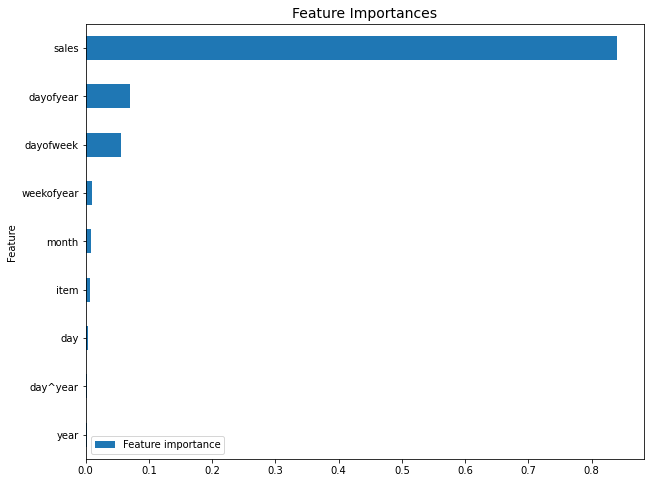

In [92]:
# Plot feature importance of selected model - Random Forest
fea_df = pd.DataFrame({'Feature':feature_cols, 'Feature importance':reg.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

fig, ax = plt.subplots(figsize=(10,8))
fea_df.plot.barh(x='Feature', y='Feature importance', ax=ax)
plt.title('Feature Importances', fontsize=14);

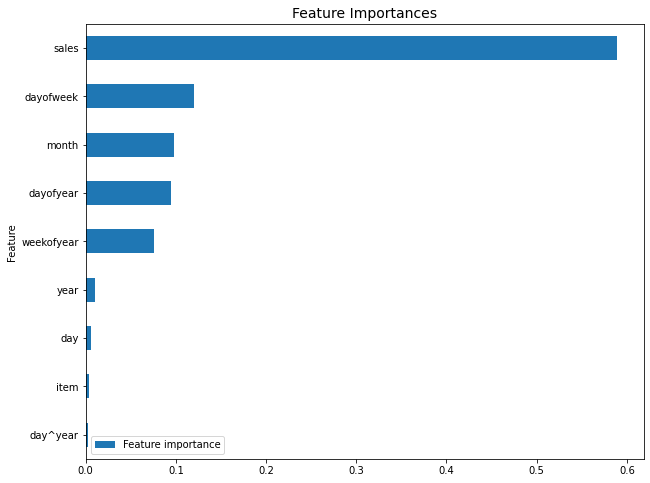

In [93]:
# Plot feature importance of selected model - XGB
fea_df = pd.DataFrame({'Feature':feature_cols, 'Feature importance':reg2.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

fig, ax = plt.subplots(figsize=(10,8))
fea_df.plot.barh(x='Feature', y='Feature importance', ax=ax)
plt.title('Feature Importances', fontsize=14);